In [ ]:
!pip install librosa 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Dataset Information

 Dữ liệu này được chuẩn hóa bằng việc sử dụng Virufy's Common Data Format. Những nguồn dữ liệu bao gồm:

+) https://github.com/virufy/virufy-cdf-coughvid

+) https://github.com/virufy/virufy-cdf-india-clinical-1

+) https://github.com/virufy/virufy-cdf-coswara


---




Note: Những file audio bao gồm:\
+) .webm\
+) .ogg\
+) .mp3\
+) .m4a\
+) .wav\


---



`row`: số dòng dữ liệu\
`source`: nguồn dữ liệu\
`patient_id`: mã bệnh nhân\
`cough_detected`: xác suất file audio chứa âm thanh tiếng ho thật\
`audio_path`: file path lưu tiếng ho của bệnh nhân\
`audio_type`: tiếng ho hoặc lời nói\
`age`: tuổi bệnh nhân\
`biological_sex`: giới tính lúc sinh: male / female / NaN\
`reported_gender`: giới tính bệnh nhân khai báo\
`submission_date`: ngày bệnh nhân nộp tiếng ho\
`pcr_test_date`: ngày test PCR\
`pcr_result_date`: ngày có kết quả PCR\
`respiratory_condition`: chỉ số Boolean về việc bệnh nhân có bị bệnh về đường hô hấp hay không\
`fever_or_muscle_pain`: chỉ số Boolean về việc bệnh nhân có bị sốt hoặc đau cơ hay không\
`pcr_test_result`: kết quả test PCR:
*   positive: dương tính
*   negative: âm tính
*   untested: không test được / chưa test
*   pending: đang chờ kết quả

`pcr_test_result_inferred`: kết quả dự đoán bệnh nhân có bị Covid hay không đựa trên những thông tin của nguồn data được cung cấp:
*   positive: dương tính
*   negative: âm tính
*   untested: không test được / chưa test
*   pending: đang chờ kết quả

`covid_symptoms`: chỉ số Boolean về việc bệnh nhân có triệu chứng bị Covid hay không





---



##Lookthrough

In [ ]:
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt

import IPython.display as ipd
import librosa
import numpy as np
import librosa.display
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/virufy-cdf-coughvid.csv')
df

,Unnamed: 0,source,patient_id,cough_detected,cough_path,age,biological_sex,reported_gender,submission_date,pcr_test_date,pcr_result_date,respiratory_condition,fever_or_muscle_pain,pcr_test_result,pcr_test_result_inferred,covid_symptoms
0,0,coughvid,ae029647-ddc3-47f5-904e-813358c9dda3,0.8929,virufy-cdf-coughvid/ae029647-ddc3-47f5-904e-81...,NaN,NaN,NaN,2020-10-20T11:05:04.501905+00:00,NaN,NaN,NaN,NaN,untested,untested,NaN
1,1,coughvid,cac4a470-bb86-4db9-9453-d4e2706c3931,0.1431,virufy-cdf-coughvid/cac4a470-bb86-4db9-9453-d4...,NaN,NaN,NaN,2020-04-17T15:12:14.379396+00:00,NaN,NaN,NaN,NaN,untested,untested,NaN
2,2,coughvid,2a3d201f-7c70-449c-adc5-50de728fccd0,0.0803,virufy-cdf-coughvid/2a3d201f-7c70-449c-adc5-50...,38.0,male,male,2020-04-09T20:56:01.725275+00:00,NaN,NaN,False,False,untested,negative,False
3,3,coughvid,8b267d78-97f0-4530-bbfa-e938724376f4,0.1247,virufy-cdf-coughvid/8b267d78-97f0-4530-bbfa-e9...,NaN,NaN,NaN,2020-04-11T11:12:19.213465+00:00,NaN,NaN,NaN,NaN,untested,untested,NaN
4,4,coughvid,68d5215b-afdb-4b7a-81d3-fbd5677de7b4,1.0000,virufy-cdf-coughvid/68d5215b-afdb-4b7a-81d3-fb...,46.0,male,male,2020-11-26T16:21:47.764016+00:00,NaN,NaN,False,False,untested,negative,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22035,22035,coughvid,ea14155e-a4bf-4cfb-89bd-0f2c7cae0a33,0.3717,virufy-cdf-coughvid/ea14155e-a4bf-4cfb-89bd-0f...,50.0,male,male,2020-11-27T15:19:35.847930+00:00,NaN,NaN,False,False,untested,negative,False
22036,22036,coughvid,76682a59-1c14-44e8-93b9-f9f5f774e897,1.0000,virufy-cdf-coughvid/76682a59-1c14-44e8-93b9-f9...,17.0,male,male,2020-06-28T00:19:57.263554+00:00,NaN,NaN,False,False,untested,untested,True
22037,22037,coughvid,e59eba05-4b00-41f8-924d-01110aa3cb1b,0.0380,virufy-cdf-coughvid/e59eba05-4b00-41f8-924d-01...,22.0,male,male,2020-04-23T07:06:24.416734+00:00,NaN,NaN,False,False,untested,untested,True
22038,22038,coughvid,ed7e5ffe-ed3e-432f-9025-fd48fcd308df,0.0068,virufy-cdf-coughvid/ed7e5ffe-ed3e-432f-9025-fd...,52.0,female,female,2020-04-13T20:34:59.519855+00:00,NaN,NaN,False,False,untested,negative,False


In [ ]:
df['date'] = df.submission_date.apply(lambda x: pd.to_datetime(x[:10]))
df

,Unnamed: 0,source,patient_id,cough_detected,cough_path,age,biological_sex,reported_gender,submission_date,pcr_test_date,pcr_result_date,respiratory_condition,fever_or_muscle_pain,pcr_test_result,pcr_test_result_inferred,covid_symptoms,date
0,0,coughvid,ae029647-ddc3-47f5-904e-813358c9dda3,0.8929,virufy-cdf-coughvid/ae029647-ddc3-47f5-904e-81...,NaN,NaN,NaN,2020-10-20T11:05:04.501905+00:00,NaN,NaN,NaN,NaN,untested,untested,NaN,2020-10-20
1,1,coughvid,cac4a470-bb86-4db9-9453-d4e2706c3931,0.1431,virufy-cdf-coughvid/cac4a470-bb86-4db9-9453-d4...,NaN,NaN,NaN,2020-04-17T15:12:14.379396+00:00,NaN,NaN,NaN,NaN,untested,untested,NaN,2020-04-17
2,2,coughvid,2a3d201f-7c70-449c-adc5-50de728fccd0,0.0803,virufy-cdf-coughvid/2a3d201f-7c70-449c-adc5-50...,38.0,male,male,2020-04-09T20:56:01.725275+00:00,NaN,NaN,False,False,untested,negative,False,2020-04-09
3,3,coughvid,8b267d78-97f0-4530-bbfa-e938724376f4,0.1247,virufy-cdf-coughvid/8b267d78-97f0-4530-bbfa-e9...,NaN,NaN,NaN,2020-04-11T11:12:19.213465+00:00,NaN,NaN,NaN,NaN,untested,untested,NaN,2020-04-11
4,4,coughvid,68d5215b-afdb-4b7a-81d3-fbd5677de7b4,1.0000,virufy-cdf-coughvid/68d5215b-afdb-4b7a-81d3-fb...,46.0,male,male,2020-11-26T16:21:47.764016+00:00,NaN,NaN,False,False,untested,negative,False,2020-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22035,22035,coughvid,ea14155e-a4bf-4cfb-89bd-0f2c7cae0a33,0.3717,virufy-cdf-coughvid/ea14155e-a4bf-4cfb-89bd-0f...,50.0,male,male,2020-11-27T15:19:35.847930+00:00,NaN,NaN,False,False,untested,negative,False,2020-11-27
22036,22036,coughvid,76682a59-1c14-44e8-93b9-f9f5f774e897,1.0000,virufy-cdf-coughvid/76682a59-1c14-44e8-93b9-f9...,17.0,male,male,2020-06-28T00:19:57.263554+00:00,NaN,NaN,False,False,untested,untested,True,2020-06-28
22037,22037,coughvid,e59eba05-4b00-41f8-924d-01110aa3cb1b,0.0380,virufy-cdf-coughvid/e59eba05-4b00-41f8-924d-01...,22.0,male,male,2020-04-23T07:06:24.416734+00:00,NaN,NaN,False,False,untested,untested,True,2020-04-23
22038,22038,coughvid,ed7e5ffe-ed3e-432f-9025-fd48fcd308df,0.0068,virufy-cdf-coughvid/ed7e5ffe-ed3e-432f-9025-fd...,52.0,female,female,2020-04-13T20:34:59.519855+00:00,NaN,NaN,False,False,untested,negative,False,2020-04-13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22040 entries, 0 to 22039
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                22040 non-null  int64         
 1   source                    22040 non-null  object        
 2   patient_id                22040 non-null  object        
 3   cough_detected            22040 non-null  float64       
 4   cough_path                22040 non-null  object        
 5   age                       12137 non-null  float64       
 6   biological_sex            12956 non-null  object        
 7   reported_gender           12956 non-null  object        
 8   submission_date           22040 non-null  object        
 9   pcr_test_date             0 non-null      float64       
 10  pcr_result_date           0 non-null      float64       
 11  respiratory_condition     12956 non-null  object        
 12  fever_or_muscle_pa

In [ ]:
df.describe()

,Unnamed: 0,cough_detected,age,pcr_test_date,pcr_result_date
count,22040.000000,22040.000000,12137.000000,0.0,0.0
mean,11019.500000,0.649919,36.724289,NaN,NaN
std,6362.544302,0.387780,14.587690,NaN,NaN
min,0.000000,0.000000,1.000000,NaN,NaN
25%,5509.750000,0.209400,26.000000,NaN,NaN
50%,11019.500000,0.873500,35.000000,NaN,NaN
75%,16529.250000,0.986100,46.000000,NaN,NaN
max,22039.000000,1.000000,102.000000,NaN,NaN


##EDA

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="Distribution by Age")))
fig.add_trace(go.Histogram(histfunc="count",  x=df.age))
fig.show()

In [ ]:
df_pos = df[df.pcr_test_result_inferred=='positive']

fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="Distribution by Age")))
fig.add_trace(go.Histogram(histfunc="count",  x=df_pos.age))
fig.show()

In [ ]:
import plotly.graph_objects as ply_go

my_title_layout = dict({"text":"my distribution", 'xanchor':'center', 'x':0.5, 'y':0.9, 'font':{'size':24}})
my_xaxis_layout = dict(title=dict(text="my x axis", font={'size':16}))
my_layout = dict(title=my_title_layout,
                xaxis= my_xaxis_layout)

fig = ply_go.Figure( layout=my_layout)


for tmp_diag in df['pcr_test_result_inferred'].unique():
    violin_data = ply_go.Violin(x=df.loc[df['pcr_test_result_inferred']==tmp_diag, 'pcr_test_result_inferred'],
                                y=df.loc[df['pcr_test_result_inferred']==tmp_diag, 'age'],
                                name=tmp_diag,
                                box_visible=True,
                                meanline_visible=True)
    fig.add_trace(violin_data)
    #end for
fig.update_layout(title={'text': "Distribution of AGE by type of DIAGNOSIS"}, xaxis={"title":{"text":None}}, 
                  yaxis={"title":{"text":"AGE [years]"}})
fig.show()

In [ ]:
def summarise_pivot_df(df, xcols, ycols, valcol):
    summary_df = df[xcols+ycols+valcol]
    summary_df.loc[summary_df[xcols[0]].isnull(),xcols] = 'n/a' #replace NA with a default string
    summary_df.loc[summary_df[ycols[0]].isnull(),ycols] = 'n/a' #replace NA with a default string
    summary_df = summary_df.groupby(xcols+ycols).count().reset_index()
    print(summary_df)
    pivot_df = pd.pivot_table(data=summary_df,values=valcol, index=xcols,columns=ycols)
    pivot_df.columns = [ c[1] for c in pivot_df.columns ] # get rid of multiindex
    return pivot_df

def pandas_to_plotly_heatdata(df):
    #print(df.index)
    return {'x': df.columns.tolist(),
            'y': df.index.tolist(),
            'z': df.values.tolist()}

In [ ]:
import plotly.colors as ply_colors
import plotly.figure_factory as ply_ff

# Heatmap Age vs status
df['age_class'] = 0 # NAs will end up here
df.loc[ (df['age']<40),'age_class'] = 1
df.loc[ (df['age']>=40) &(df['age']<60),'age_class'] = 2
df.loc[ (df['age']>=60),'age_class'] = 3

meta_summary_df = summarise_pivot_df(df, ['age_class'], ['pcr_test_result_inferred'], ['patient_id'])
meta_summary_df = meta_summary_df[['negative','positive','untested']]
n = meta_summary_df.sum().sum()
#print( pandas_to_plotly_heatdata(meta_summary_df) )
heat_data = ply_go.Heatmap(pandas_to_plotly_heatdata(meta_summary_df), 
                           colorscale=ply_colors.sequential.Oranges,
                           colorbar={'title':"Entries", 'titleside':"top"} ,
                           text=meta_summary_df.values)
rounded_annotation = [ ["NA" if pd.isnull(c) else "{:.0f}".format(c) for c in r] for r in heat_data['z']]
fig = ply_ff.create_annotated_heatmap(z=heat_data['z'], 
                                      x=heat_data['x'],
                                      y=heat_data['y'],#
                                      #y=[int(i) for i,t in enumerate(heat_data['y']) ],
                                      annotation_text=rounded_annotation,
                                      colorscale=heat_data['colorscale'],
                                      showscale=True,
                                      colorbar=heat_data['colorbar']  )
fig.update_layout( yaxis={"title":{"text":"Age"},
                          "tickmode":'array',"tickvals":[3,2,1,0,],"ticktext":['> 60 yo','40 - 60 yo','< 40 yo', 'n/a']})
fig.show()

    age_class pcr_test_result_inferred  patient_id
0           0                 negative         606
1           0                 positive         157
2           0                 untested        9140
3           1                 negative        5581
4           1                 positive         515
5           1                 untested        1303
6           2                 negative        2986
7           2                 positive         204
8           2                 untested         603
9           3                 negative         810
10          3                 positive          48
11          3                 untested          87


From the graph, we can see that most surveyed participants are aged 20-50, of which an average of 36.7 years old. In the data set, it also acknowledged special cases such as 6 months old to 4 and a half or over 95 years of age. The lowest age in dataset is the 6 months old baby and the highest is 102 and a half.

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="Distribution by Gender")))
fig.add_trace(go.Histogram(histfunc="count",  x=df.biological_sex))
fig.show()

In [ ]:
86/(8327+4543+86)

0.006637851188638469

Among the genders of the interviewees, male gender accounted for the most with 64.27%. In addition, there were 86 people who did not specify their gender, accounting for 0.006%.

In [ ]:
date_group = df.groupby('date').count()
date_group

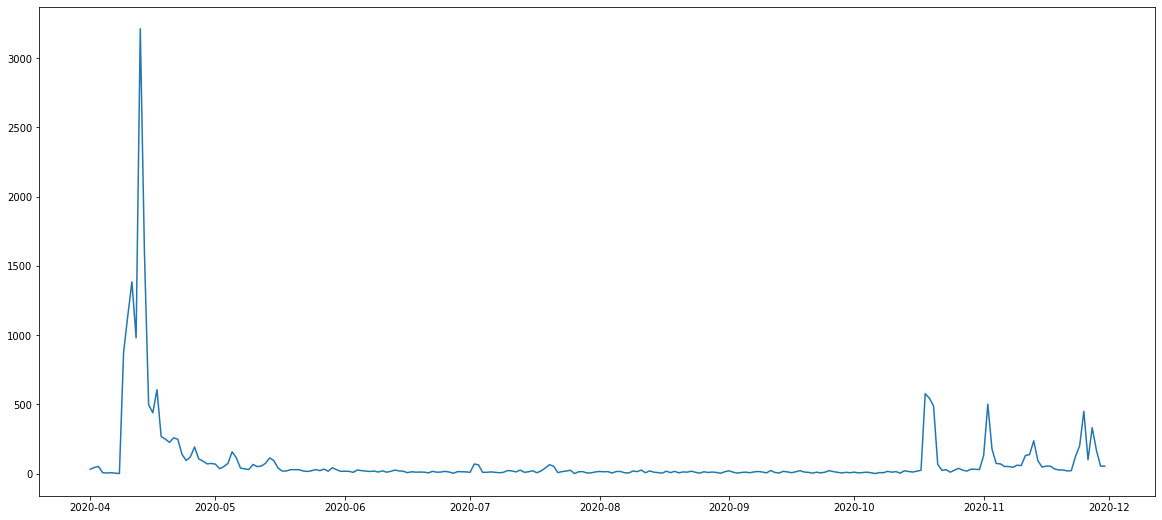

In [ ]:
plt.plot(date_group.index,date_group.source)
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

The data was collected entirely in 2020. Most of the data was collected between April and May, the time of the outbreak. Lower from June to October then continue to be collected again from mid-October to the end of December

In [ ]:
fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="Distribution by PCR result")))
fig.add_trace(go.Histogram(histfunc="count",  x=df.pcr_test_result_inferred))
fig.show()

In [ ]:
924/(9983+11133+924)

0.04192377495462795

Positive case only accounted for 0.04% data of the entire dataset => Serious imbalanced